>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 범주형  데이터 시각화
Visualizing categorical data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

우리는 [relational plot tutorial](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial)에서 여러 변수의 관계를 시각화하는 방법에 대해 알아봤습니다. 
여기서는 두 변수가 수치형인 경우만 예제로 다뤘습니다. 
이와 달리 변수 중에 범주형(categorical; 범위가 구분됨)이 있는 경우, 이에 맞는 접근법이 필요합니다.  
<br>
seaborn에는 범주형 데이터가 포함된 관계를 시각화할 수 있는 몇가지 방법이 있습니다. 
`relplot()`과 `scatterplot()`, `lineplot()`의 관계처럼, 지금 알아볼 플롯도 만드는 방법은 2가지가 있습니다. 
범주형 데이터를 plot하는 몇가지의 axes-level function이 있고, 이 함수들을 합쳐놓은 상위 레벨의 figure-level function인 `catplot()`이 있습니다.  
<br>
범주형 플롯의 종류는 크게 3가지로 나뉜다고 보면 됩니다. 
자세한 내용은 아래에서 살펴보겠습니다 :

Categorical scatterplots 범주형 산점도 :
* `stripplot()` (`kind="strip"` ; default) 
* `swarmplot()` (`kind="swarm"`)  

<br>

Categorical distribution plots 범주형 분포도 :
* `boxplot() (`kind="box"`)
* `violinplot() (`kind="violin"`)
* `boxenplot() (`kind="boxen"`)  

<br>

Categorical estimate plots :
* `pointplot()` (`kind="point"`)
* `barplot()` (`kind="bar"`)
* `countplot()` (`kind="count"`)


이러한 분류는 데이터가 세분화된 레벨에 따라 달라집니다. 
어떤 질문에 대한 답을 할 것인지를 정하고 그에 따라 어떤 방법을 사용할지 결정해야 합니다. 
통합 API를 사용하면 여러 종류의 plot을 쉽게 전환하고 다양한 관점에서 데이터를 볼 수 있다는 장점이 있습니다.  
  
이번 장에서는 주로 figure-level interface 인 `catplot()`에 대해 다룰 것입니다. 이 plot이 다른 function들을 포함하는 function (a higher-level interface)이라는 것을 기억하세요. 각 plot 예제마다 다른 방법으로도 표현을 해볼 예정이지만 세부적인 내용은 API 문서를 참고해주세요.

## 범주형 scatterplot
Categorical scatterplots

`catplot()`은 default 표현으로 scatterplot을 사용합니다. 
seaborn에는 범주형 데이터를 나타내는 scatter plot 으로 2종류가 있습니다. 
범주형 데이터를 scatterplot으로 나타내는데 가장 중요한 문제는 같은 범주에 속한 point들이 동일한 축 위에 (일렬로 겹쳐서) 위치하게 된다는 것입니다. 
그리고 이 문제를 어떤 방식으로 접근하느냐에 따라 plot의 종류가 나뉜다고 볼 수 있습니다.
`catplot()`의 default "kind"인 `stripplot()`은 랜덤한 "jitter(불안정한 진동이나 주기)"를 적용해서 데이터 포인트들의 위치를 약간씩 조정합니다 :

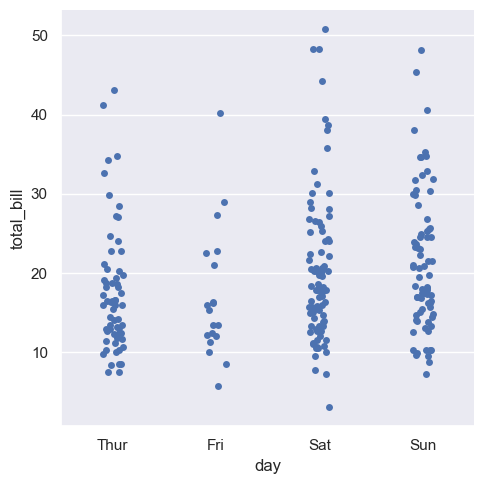

In [2]:
tips = sns.load_dataset('tips')
sns.catplot(data=tips, x='day', y='total_bill');

`jitter` parameter로 jitter의 세기를 조절하거나 없앨 수도 있습니다.

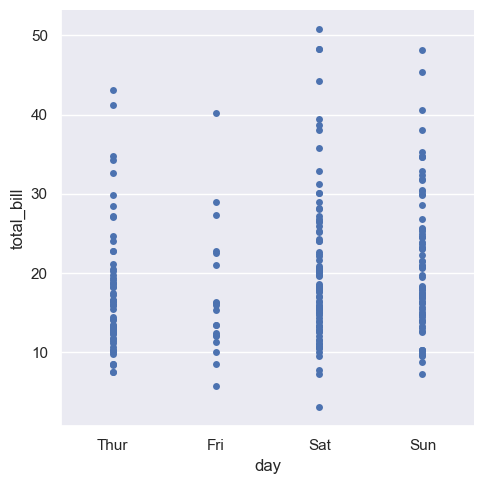

In [3]:
# sns.scatterplot(data=tips, x='day', y='total_bill')
sns.catplot(data=tips, x='day', y='total_bill', jitter=False);

두 번째 방법은 point가 겹치지 않게 하는 알고리즘을 사용해서 축을 따라 위치를 조정합니다. 
이 방법은 상대적으로 작은 크기의 데이터셋에만 적용 가능하지만, 관측값의 분포를 더 잘 표현해줍니다. 
이런 종류를 "벌집(beeswarm)"이라고 부르기도 하는데, seaborn에서는 `catplot()`을 `kind="swarm"`으로 설정하면 `swamplot()`이 그려집니다.

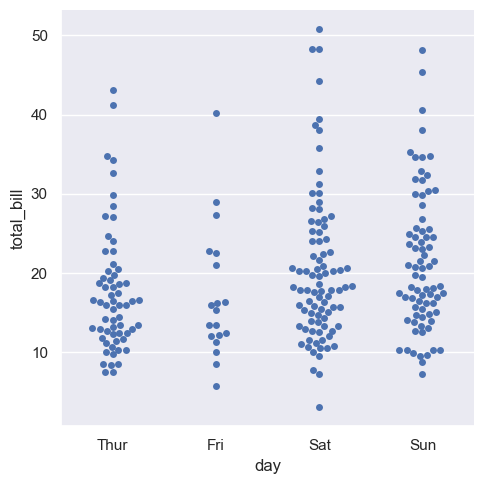

In [4]:
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm');

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

관계형(relational) plot과 마찬가지로, 범주형 plot에서도 `hue` semantic을 사용해서 새로운 차원을 추가할 수 있습니다. 
(범주형 plot은 현재 `size`나 `style` semantic을 지원하지 않습니다.) 
`hue` semantic을 다루는 방식은 각 범주형 plot마다 달라지는데, scatter plot에서는 point의 color만을 변경하면 됩니다 :

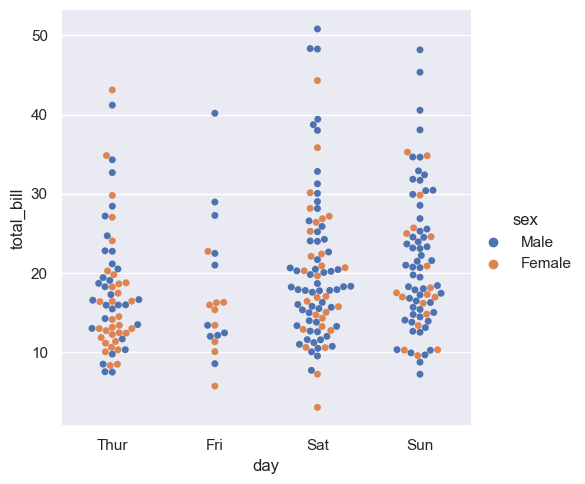

In [5]:
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='swarm');

수치형 데이터와 달리, 범주형 변수는 level을 정하고 정렬하는 기준이 항상 명확하지는 않습니다. 
보통, seaborn의 categorical plooting function은 dat에서의 범주의 순서를 가져오려고 합니다. 
데이터가 pandas `Categorical` datatype일 경우에는 해당 카테고리 default order를 가져와서 반영합니다. 
그리고 범주형 axis에 전달된 변수가 수치형처럼 보일 경우, 이에 따라 level이 정렬됩니다. 
단, 숫자를 사용해서 레이블을 지정했더라도 데이터는 여전히 범주형으로 취급되어 그려집니다 (ex. 범주형 축 0, 1, ...) :

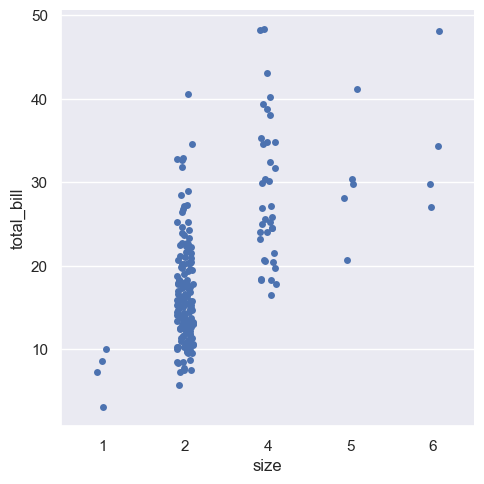

In [6]:
sns.catplot(data=tips.query('size != 3'), x='size', y='total_bill');

기본설정 순서(default order)를 선택하는 또 다른 옵션은 데이터셋에 표시되는대로 카테고리의 수준(level)을 그대로 사용하는 것입니다. 
`order` parameter를 이용해서 구체적인 순서를 설정할 수도 있습니다. 
이 기능은 같은 figure에 여러개의 범주형 plot을 그릴 때 특히 유용할 수 있는데, 자세한 내용은 아래에서 살펴보겠습니다 :

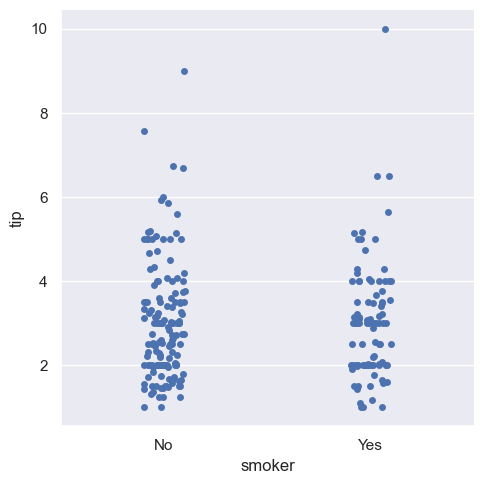

In [7]:
sns.catplot(data=tips, x='smoker', y='tip', order=["No", "Yes"]);

위에서 우리는 "범주형 축(categorical axis)"에 대해 언급했습니다. 
그리고 지금까지 예제에서는 이 범주형 축이 항상 가로 축에 해당했습니다.  
  
그러나 항상 범주형 축이라고 항상 가로 축(horizontal axis)이 되는 것은 아닙니다. 
상황에 따라 (범주 이름이 길거나 카테고리가 많은 경우) 세로 축(vertical axis)에 배치하는 것이 더 좋을 수도 있습니다. 이럴 때는 변수를 축에 바꿔서(swap) 할당하면 됩니다.

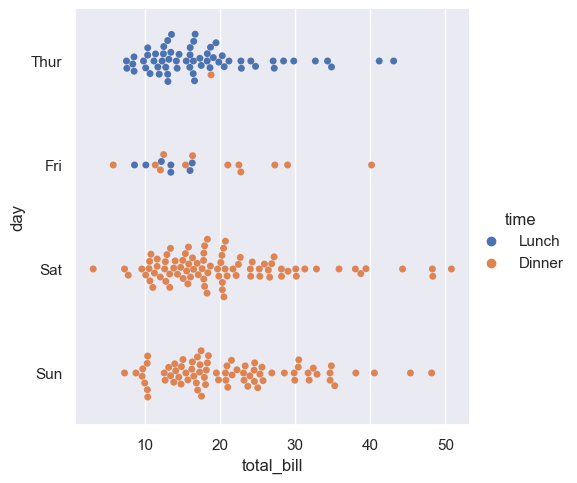

In [8]:
sns.catplot(data=tips, x='total_bill', y='day', hue='time', kind='swarm');